# <span style="color:orange">Clustering sur les données du Baromètre lorrain de la Science Ouverte</span>

Le clustering, ou partitionnement des données, est une méthode d'analyse permettant de rassembler des données dans des "paquets", afin d'identifier des relations, des tendances. Ici, l'objectif est de voir s'il existe une corrélation entre le nombre de publications et leur taux d'accès ouvert, ou encore une corrélation entre accès ouvert et discipline.

In [1]:
# Importe les librairies nécessaires
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import cluster
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns

Importer le jeu de données avec lequel on souhaite travailler :

In [2]:
publis_lorraine_df = pd.read_csv("Data/outputs/publis_lorraine_completes.csv")

Restreindre à l'année souhaitée :

In [3]:
publications_2018 = publis_lorraine_df.loc[publis_lorraine_df['published_year'] == 2018.0,:]

Créer une DataFrame avec deux informations : le nombre de publications dans l'année en fonction de la discipline, et le nombre de publications en accès ouvert dans ces mêmes disciplines.

In [17]:
publications_par_domaine = publications_2018['scientific_field'].value_counts().sort_index()
publications_par_domaine = publications_par_domaine.to_frame()

In [18]:
publications_en_oa = publications_2018.loc[publications_2018['is_oa']==True,:]
publications_en_oa = publications_en_oa['scientific_field'].value_counts().sort_index()
publications_en_oa = publications_en_oa.to_frame()

In [6]:
publis_triees = pd.merge(publications_par_domaine, publications_en_oa, left_index = True, right_index = True)
publis_triees = publis_triees.rename(columns = {'scientific_field_x': 'Nb total de publications', 'scientific_field_y': 'Nb de publications en accès ouvert'})
publis_triees = publis_triees.rename_axis('Disciplines')
publis_triees["Disciplines"] = publications_en_oa.index
publis_triees

,Nb total de publications,Nb de publications en accès ouvert,Disciplines
Disciplines,,,
Biology (fond.),473,309,Biology (fond.)
Chemistry,306,91,Chemistry
Computer and \n information sciences,407,243,Computer and \n information sciences
"Earth, Ecology, \nEnergy and applied biology",399,189,"Earth, Ecology, \nEnergy and applied biology"
Engineering,211,90,Engineering
Humanities,79,45,Humanities
Mathematics,173,134,Mathematics
Medical research,834,409,Medical research
"Physical sciences, Astronomy",592,326,"Physical sciences, Astronomy"


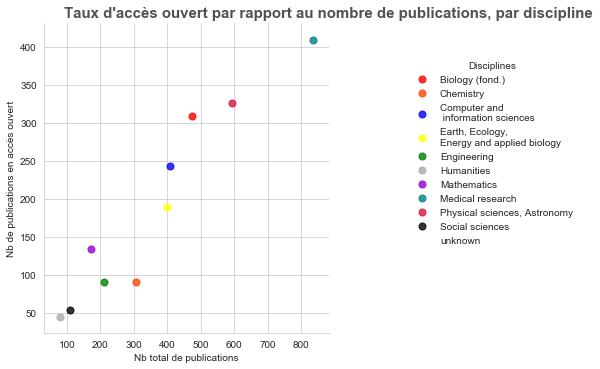

In [11]:
sns.set_style("whitegrid")

facet = sns.lmplot(data=publis_triees, x='Nb total de publications', y='Nb de publications en accès ouvert', hue='Disciplines',
                   fit_reg=False, legend=True, legend_out=True, palette=['red','orangered', 'blue', 'yellow', 'green',
                                                                        'darkgray', 'darkviolet', 'teal', 'crimson', 'black', 'white'],
                  scatter_kws={"s": 50})

plt.title("Taux d'accès ouvert par rapport au nombre de publications, par discipline", fontsize = 15, x = 1, y = 2,
          fontweight = 'bold', alpha = 0.8)

facet._legend.set_bbox_to_anchor((1.1, 0.6))

plt.savefig('Data/outputs/rapport_oa_nb_publications.png', dpi=100, bbox_inches='tight', pad_inches=0.9)

In [14]:
publications_par_editeur = publications_2018['publisher'].value_counts().sort_index()
publications_par_editeur = publications_par_editeur.to_frame()

In [16]:
publications_en_oa_ed = publications_2018.loc[publications_2018['is_oa']==True,:]
publications_en_oa_ed = publications_en_oa_ed['publisher'].value_counts().sort_index()
publications_en_oa_ed = publications_en_oa_ed.to_frame()

In [32]:
publis_triees_ed = pd.merge(publications_par_editeur, publications_en_oa_ed, left_index = True, right_index = True)
publis_triees_ed = publis_triees_ed.rename(columns = {'publisher_x': 'Nb total de publications', 'publisher_y': 'Nb de publications en accès ouvert'})
publis_triees_ed = publis_triees_ed.rename_axis('Editeurs')
publis_triees_ed["Editeurs"] = publications_en_oa_ed.index
publis_triees_ed = publis_triees_ed.sort_values(by=['Nb total de publications'], ascending=False)
publis_triees_ed = publis_triees_ed[0:20]
publis_triees_ed

,Nb total de publications,Nb de publications en accès ouvert,Editeurs
Editeurs,,,
Elsevier BV,1131,419,Elsevier BV
Springer Science and Business Media LLC,422,236,Springer Science and Business Media LLC
Wiley,244,125,Wiley
Springer International Publishing,167,66,Springer International Publishing
IEEE,144,58,IEEE
IOP Publishing,110,79,IOP Publishing
MDPI AG,106,106,MDPI AG
American Chemical Society (ACS),105,35,American Chemical Society (ACS)
Oxford University Press (OUP),104,80,Oxford University Press (OUP)


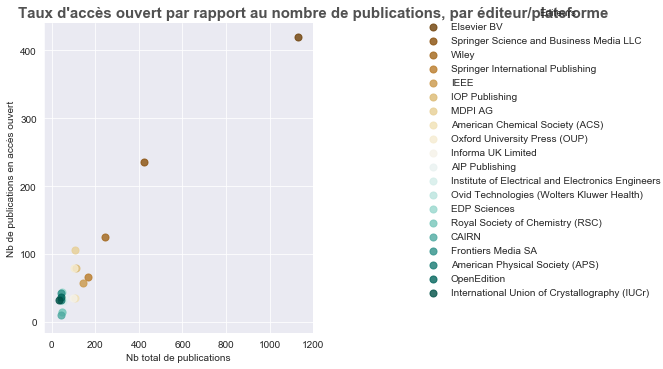

In [58]:
sns.set_style("darkgrid")

facet = sns.lmplot(data=publis_triees_ed, x='Nb total de publications', y='Nb de publications en accès ouvert', hue='Editeurs',
                   fit_reg=False, legend=True, scatter_kws={"s": 50}, palette='BrBG')

plt.title("Taux d'accès ouvert par rapport au nombre de publications, par éditeur/plateforme", fontsize = 15, x = 1, y = 2,
          fontweight = 'bold', alpha = 0.8)

sns.color_palette("cubehelix", 20)

facet._legend.set_bbox_to_anchor((1.1, 0.6))

plt.savefig('Data/outputs/rapport_oa_nb_publications_editeurs.png', dpi=100, bbox_inches='tight', pad_inches=0.9)